# ML Project on Diamond Price Prediction

## Problem statement

In this project,a Diamond dataset is used, which contains the prices and other attributes of almost 54,000 diamonds

This data set contains:
- price : price in US dollars ($326-$18,823)

- carat : weight of the diamond (0.2--5.01)

- cut : quality of the cut (Fair, Good, Very Good, Premium, Ideal)

- color : diamond colour, from J (worst) to D (best)

- clarity : a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

- x : length in mm (0--10.74)

- y : width in mm (0--58.9)

- z : depth in mm (0--31.8)

- depth : total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

- table : width of top of diamond relative to widest point (43--95)

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Reading the csv data into a DataFrame

In [247]:
df = pd.read_csv('data/diamonds.csv')

#### Show top 5 records and dataset info

In [248]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [250]:
df.shape

(53940, 10)

#### check if data has missing values

In [251]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

#### Check statistics of the data

In [252]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


- Min value of "x", "y", "z" are zero this indicates that there are faulty values in data that represents dimensionless or 2-dimensional diamonds. So we need to filter out those as it clearly faulty data points.

In [253]:
#Dropping dimentionless diamonds
df = df.drop(df[df["x"]==0].index)
df = df.drop(df[df["y"]==0].index)
df = df.drop(df[df["z"]==0].index)

In [254]:
df.shape

(53920, 10)

- 20 points were deleted

#### Find the numerical and categorical features of the dataset

In [255]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 7 numerical features : ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

We have 3 categorical features : ['cut', 'color', 'clarity']


In [256]:
print("Categories in 'cut' variable: ",end=" " )
print(df['cut'].unique())

print("Categories in 'color' variable: ",end=" " )
print(df['color'].unique())

print("Categories in 'clarity' variable: ",end=" " )
print(df['clarity'].unique())

Categories in 'cut' variable:  ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
Categories in 'color' variable:  ['E' 'I' 'J' 'H' 'F' 'G' 'D']
Categories in 'clarity' variable:  ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


## Exploring Data (Visualization)

#### Exploring each of the categorical features with the price since they are essential factors for considering the price

<AxesSubplot:xlabel='color', ylabel='price'>

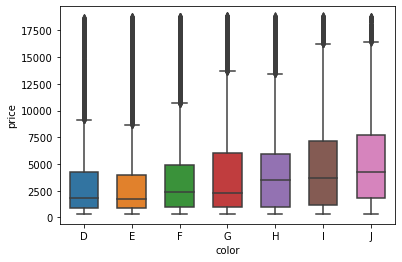

In [257]:
# price vs color
sns.boxplot(y='price',x='color',data=df,width =0.6,order = ['D','E','F','G','H','I','J'] )

<AxesSubplot:xlabel='cut', ylabel='price'>

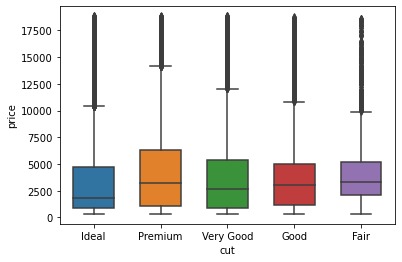

In [258]:
# price vs cut
sns.boxplot(y='price',x='cut',data=df,width=0.6, order =['Ideal' ,'Premium' ,'Very Good' ,'Good' ,'Fair'])

<AxesSubplot:xlabel='clarity', ylabel='price'>

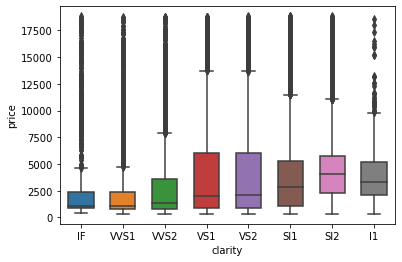

In [259]:
# price vs clarity
sns.boxplot(y='price',x='clarity',data=df,width=0.6, order=['IF','VVS1','VVS2','VS1','VS2','SI1','SI2','I1'])

### Insights
- We can see that G, H, I and J type color has less number of outliers compared to D and E. It suggests that the better the quality of color the higher the price
- We can see that the lower the quality of cut, the higher the number of outliers except for the Ideal cut type.
- we can see that IF, VVS1 and VVS2 have a high number of outliers compared to other categories of color. Moreover VS1,VS2 are having less number of outliers compared to others.

#### Correlation between the features using corr()

In [260]:
df.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028259,0.181646,0.921592,0.977779,0.953991,0.961048
depth,0.028259,1.000000,-0.295733,-0.010729,-0.025017,-0.029069,0.095023
table,0.181646,-0.295733,1.000000,0.127245,0.196097,0.184493,0.152483
price,0.921592,-0.010729,0.127245,1.000000,0.887231,0.867864,0.868206
x,0.977779,-0.025017,0.196097,0.887231,1.000000,0.974918,0.975435
y,0.953991,-0.029069,0.184493,0.867864,0.974918,1.000000,0.956744
z,0.961048,0.095023,0.152483,0.868206,0.975435,0.956744,1.000000


<AxesSubplot:>

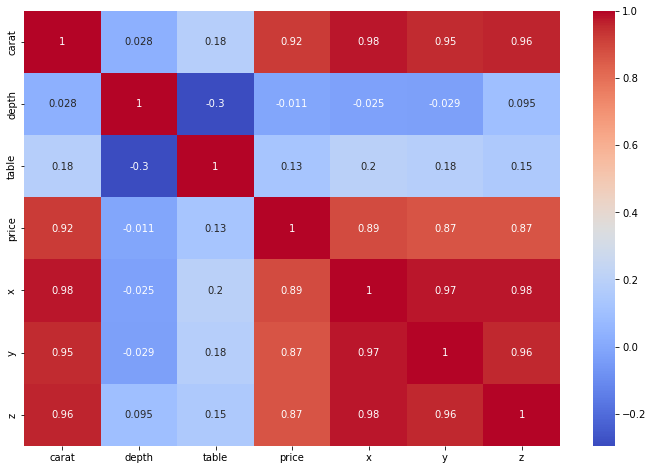

In [261]:
fig = plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

- From the above plot, We can see that carat, length(x), width(y), depth(z), and price are having a high correlation with each other.

#### Further exploration for clarity, cut and color

<AxesSubplot:xlabel='clarity'>

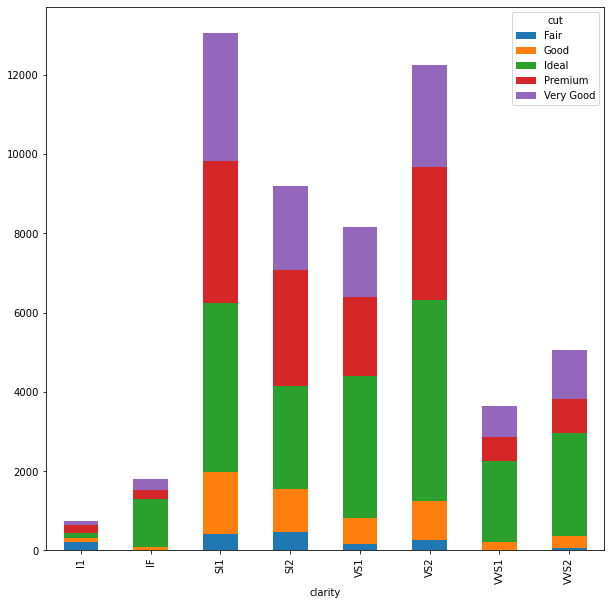

In [262]:
clarity_cut_table = pd.crosstab(index=df['clarity'],columns=df['cut'])
clarity_cut_table.plot(kind="bar", figsize=(10,10),stacked=True)

<AxesSubplot:xlabel='cut'>

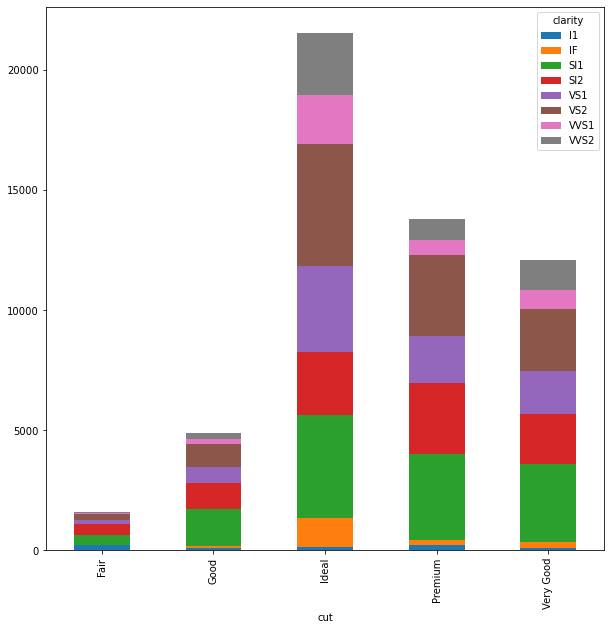

In [263]:
cut_clarity_table = pd.crosstab(index=df["cut"], columns=df["clarity"])
cut_clarity_table.plot(kind="bar", figsize=(10,10),stacked=True)

<AxesSubplot:xlabel='color'>

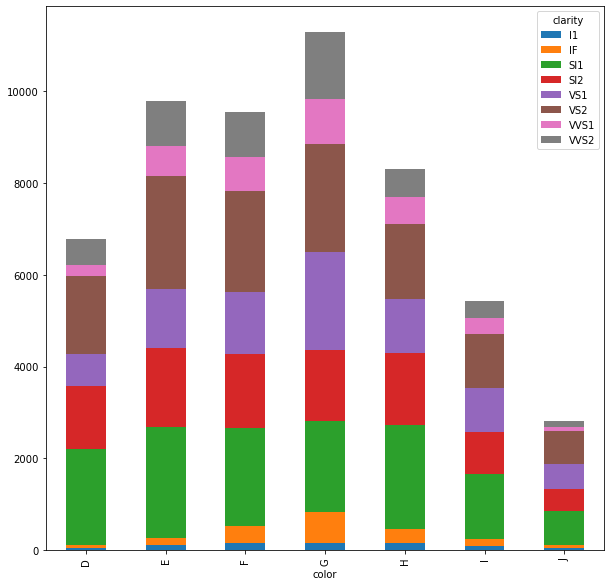

In [264]:
color_clarity_table = pd.crosstab(index=df["color"], columns=df["clarity"])
color_clarity_table.plot(kind="bar", figsize=(10,10),stacked=True)

### Insights
- We can see that most of the people prefer to buy diamond of SI1 clarity followed by VS2, SI2, and VS1. In that, the cut they prefer is Ideal, Premium, and Very Good diamond cut category. Moreover, we can infer that people are not taking the highest clarity diamonds, such as IF or VVS1 and others .
- We can see that people prefer Ideal cut over any other cut diamonds followed by Premium and Very Good. It suggests that people are focusing on cut than clarity.
- We can see that from above that most of the people prefer G color followed by E, F, and H

#### Exploring numerical types

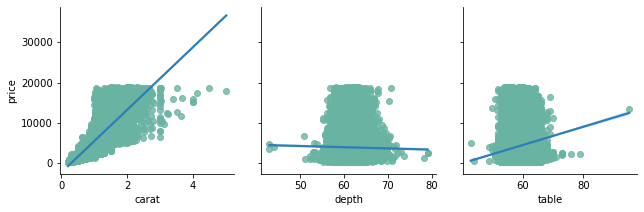

In [265]:
grid = sns.PairGrid(df, height=3, aspect=1, x_vars=['carat','depth','table'], y_vars=['price'])
grid.map(sns.regplot, scatter_kws={'color': '#69b3a2'}, line_kws={'color': '#2c7fb8'})

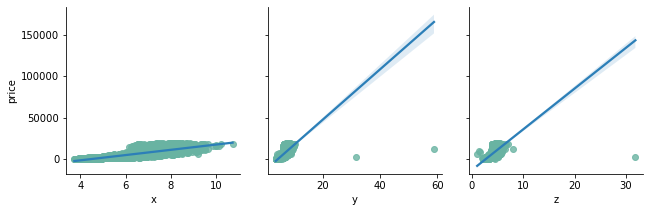

In [266]:
grid = sns.PairGrid(df, height=3, aspect=1, x_vars=['x','y','z'], y_vars=['price'])
grid.map(sns.regplot, scatter_kws={'color': '#69b3a2'}, line_kws={'color': '#2c7fb8'})

### Conclusion
- Therefore from above all the plots, we can conclude that carat has high importance followed by cut, color, and clarity in predicting the price of a diamond.
- We could see that carat, x, y, and z are showing linearity with price with fewer outliers and, table and depth % are showing linearity but with high outliers.

## Data Modeling

In [267]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [306]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

In [270]:
X = df.drop('price',axis=1)

In [271]:
y = df['price']

In [272]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

In [273]:
num_features

Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object')

In [274]:
cat_features

Index(['cut', 'color', 'clarity'], dtype='object')

In [275]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

#### Perform train test split

In [276]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
X_train.shape, X_test.shape

((37744, 9), (16176, 9))

In [277]:
X_train = preprocessor.fit_transform(X_train)
X_train.shape

(37744, 26)

In [278]:
X_test = preprocessor.transform(X_test)
X_test.shape

(16176, 26)

#### Create a model evaluation function and train the models

In [283]:
from sklearn.model_selection import GridSearchCV

def evaluate_models(X_train, y_train,X_test,y_test,models,param):
    report = {}

    for i in range(len(list(models))):
        model = list(models.values())[i]
        para=param[list(models.keys())[i]]
        
        print("*"*50)
        print("Evaluating", model, "Model")
        
        gs = GridSearchCV(model,para,cv=3)
        gs.fit(X_train,y_train)
        
        print("Best params ===", gs.best_params_)

        model.set_params(**gs.best_params_)
        model.fit(X_train, y_train)

        y_test_pred = model.predict(X_test)

        test_model_score = r2_score(y_test, y_test_pred)

        report[list(models.keys())[i]] = test_model_score

    return report

In [284]:
models = {
    "Linear Regression": LinearRegression(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "AdaBoost Regressor": AdaBoostRegressor(),
    "Gradient Boosting": GradientBoostingRegressor()
}

#### Params for Hyperparameter Tuning

In [285]:
params = {
    "Decision Tree": {
        'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    },
    "Random Forest Regressor": {                 
        'n_estimators': [8, 16, 32, 64, 100 ,128, 256]
    },
    "Gradient Boosting": {
        'learning_rate': [0.1, 0.01, 0.05, 0.001],
        'subsample': [0.6, 0.7, 0.75, 0.8, 0.85, 0.9],
        'n_estimators': [8, 16, 32, 64, 128, 256]
    },
    "Linear Regression": {},
    "XGBRegressor": {
        'learning_rate': [0.1, 0.01, 0.05, 0.001],
        'n_estimators': [8, 16, 32, 64, 128, 256]
    },
    "AdaBoost Regressor": {
        'learning_rate': [0.1, 0.01, 0.5, 0.001],
        'n_estimators': [8, 16, 32, 64, 128, 256]
    },
    "K-Neighbors Regressor": {
        'n_neighbors': [3, 5, 7, 10, 15]
    }
}

#### Evaluate all models and create a report to select the best model

In [286]:
model_report = evaluate_models(X_train, y_train, X_test, y_test, models, params)

**************************************************
Evaluating LinearRegression() Model
Best params === {}
**************************************************
Evaluating KNeighborsRegressor() Model
Best params === {'n_neighbors': 5}
**************************************************
Evaluating DecisionTreeRegressor() Model
Best params === {'criterion': 'friedman_mse'}
**************************************************
Evaluating RandomForestRegressor() Model
Best params === {'n_estimators': 256}
**************************************************
Evaluating XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs

In [287]:
model_report

{'Linear Regression': 0.9179337214700292,
 'K-Neighbors Regressor': 0.9608956141524677,
 'Decision Tree': 0.9647678711648617,
 'Random Forest Regressor': 0.9817021068443751,
 'XGBRegressor': 0.9815538279013138,
 'AdaBoost Regressor': 0.886965952993658,
 'Gradient Boosting': 0.9747427841122297}

In [288]:
best_model_score = max(sorted(model_report.values()))

In [289]:
best_model_score

0.9817021068443751

In [290]:
best_model_name = list(model_report.keys())[list(model_report.values()).index(best_model_score)]

In [291]:
best_model_name

'Random Forest Regressor'

In [292]:
best_model = models[best_model_name]

In [293]:
best_model

RandomForestRegressor(n_estimators=256)

### Insights
- From the above above model evaluation, we can see that **Random Forest Regressor** with n_estimators=256 is the best model

#### Further Model Evaluation

In [307]:
# best_model = RandomForestRegressor(n_estimators=256)
# best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
score = r2_score(y_test, y_pred) * 100

print("Mean Absolute Error = ", mae)
print("Mean Squared Error = ", mse)
print("Root Mean Squared Error = ", rmse)
print("Accuracy of the model = %.2f" %score)

Mean Absolute Error =  267.2999555384286
Mean Squared Error =  285357.51755010907
Root Mean Squared Error =  534.1886535205601
Accuracy of the model = 98.17


#### Plot y_test and y_pred

Text(0, 0.5, 'Predicted')

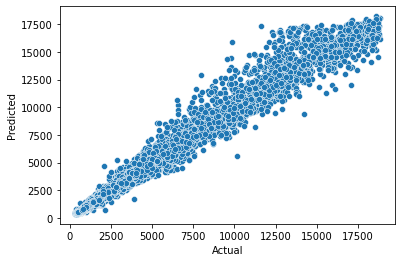

In [308]:
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

Text(0, 0.5, 'Predicted')

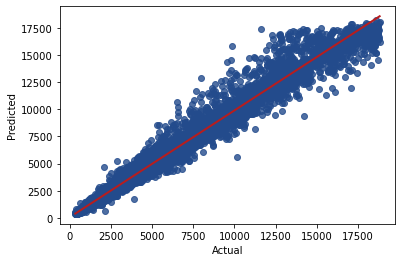

In [316]:
sns.regplot(x=y_test, y=y_pred, ci=None, line_kws={'color': '#b81d1d', 'linewidth': 2}, scatter_kws={'color': '#234b8c'})
plt.xlabel('Actual')
plt.ylabel('Predicted')

#### Difference between Actual and Predicted Values

In [317]:
pred_df = pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
34704,874,1045.013672,-171.013672
21099,9273,8191.582031,1081.417969
23685,11743,11480.203125,262.796875
39200,1064,1055.765625,8.234375
35560,906,874.605469,31.394531
...,...,...,...
26871,16800,14726.199219,2073.800781
17970,7266,6797.718750,468.281250
374,2809,2793.753906,15.246094
32353,789,833.230469,-44.230469
